In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile

import torch
import torch as th
from typing import Tuple, Optional, Union
import math
import torch.nn.functional as F
import torch.nn as nn
import torchaudio
from pl_model import PL_model
import torch
from Modules import STFT

In [2]:
mic0, sample_rate = torchaudio.load('example\mic0.wav')
mic1, sample_rate = torchaudio.load('example\mic1.wav')
mic2, sample_rate = torchaudio.load('example\mic2.wav')
mic3, sample_rate = torchaudio.load('example\mic3.wav')
orig, sample_rate = torchaudio.load('example\orig.wav')

In [3]:
fs = 16000  # Sampling frequency
window_length = int(0.025 * fs)  # 25 ms window length
window_shift = int(0.01 * fs)  # 10 ms window shift
stft = STFT(n_fft = window_length, hop=window_shift)

In [4]:
mic0_s = stft.stft(mic0)
mic1_s = stft.stft(mic1)
mic2_s = stft.stft(mic2)
mic3_s = stft.stft(mic3)
orig_s = stft.stft(orig)

In [5]:
pl_m = PL_model(mic=1)
pl_m.load_from_checkpoint("epoch=1-step=16.ckpt")

PL_model(
  (mvdr): MVDR(
    (psd): PSD()
  )
  (model_mask): mask_estimator(
    (lstm): LSTM(200, 256)
    (fc1): Sequential(
      (0): Linear(in_features=256, out_features=513, bias=True)
      (1): ReLU()
    )
    (fc2): Sequential(
      (0): Linear(in_features=513, out_features=513, bias=True)
      (1): ReLU()
    )
    (fc3): Sequential(
      (0): Linear(in_features=513, out_features=200, bias=True)
      (1): Sigmoid()
    )
  )
  (criterion): SpectralLoss()
  (metric): ScaleInvariantSignalNoiseRatio()
)

In [6]:
predict_spec, predict_signal = pl_m.forward(torch.concat([mic0, mic1, mic2, mic3])[None])

In [7]:
Audio(predict_signal.detach().numpy(), rate=16000)

In [8]:
Audio(mic0.numpy(), rate=16000)

In [9]:
Audio(orig.numpy(), rate=16000)

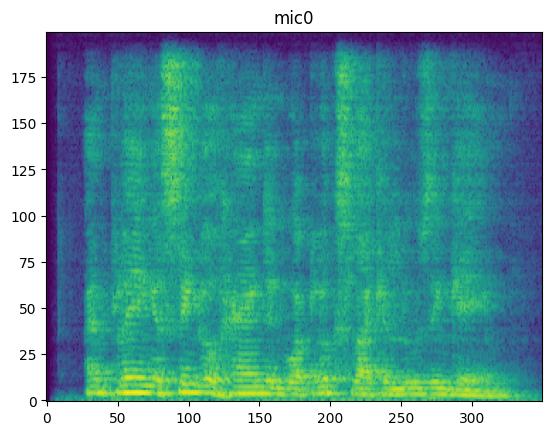

In [10]:
plt.title('mic0')
plt.imshow(torch.log(mic0_s.abs() + 1e-5)[0][:, :350], aspect='auto', origin='lower')

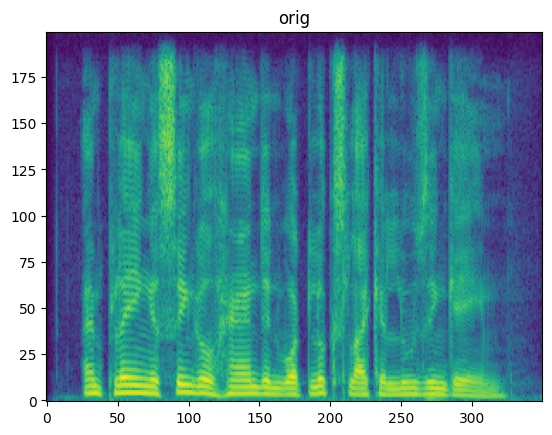

In [11]:
plt.title('orig')
plt.imshow(torch.log(orig_s.abs() + 1e-5)[0][:, :350], aspect='auto', origin='lower')

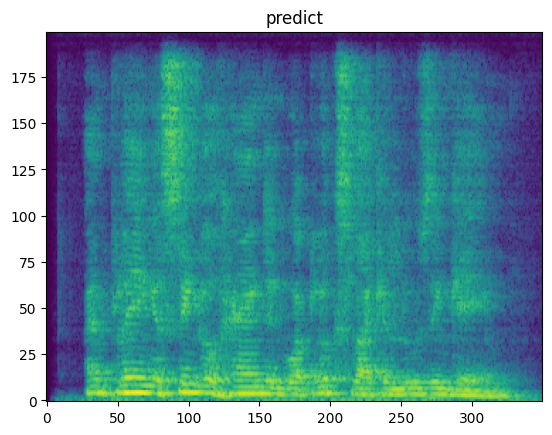

In [12]:
plt.title('predict')
plt.imshow(torch.log(predict_spec.detach()[0].abs() + 1e-5)[:, :350], aspect='auto', origin='lower')

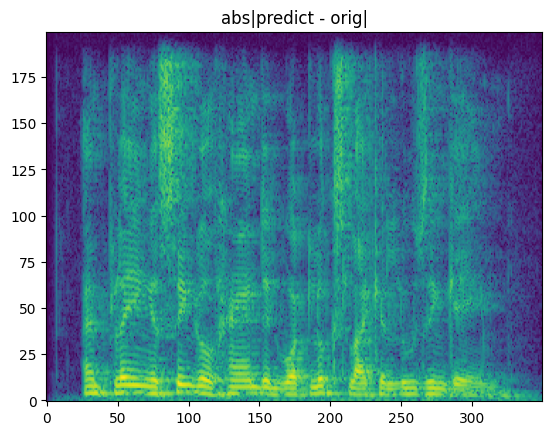

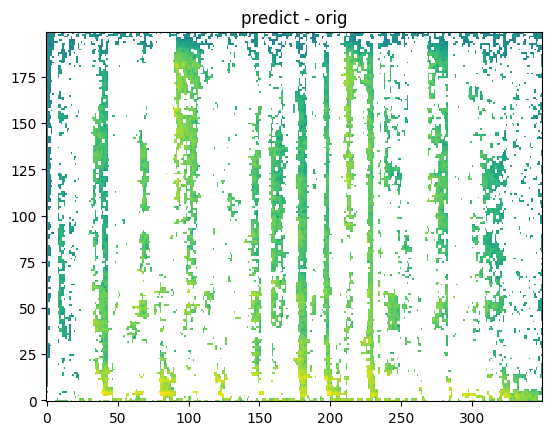

In [13]:
l1 = predict_spec.detach().abs()[0][:, :350] - orig_s.abs()[0][:, :350]

plt.title('abs|predict - orig|')
plt.imshow(torch.log( l1.abs() + 1e-5)[:, :350], aspect='auto', origin='lower');
plt.show();
plt.title('predict - orig')
plt.imshow(torch.log( l1 + 1e-5)[:, :350], aspect='auto', origin='lower')
plt.show();

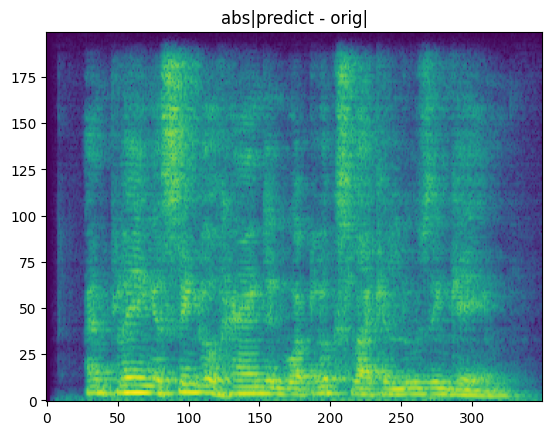

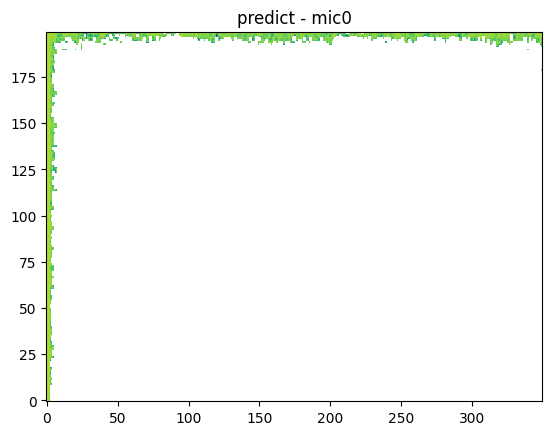

In [14]:
l1 = predict_spec.detach().abs()[0][:, :350] - mic0_s.abs()[0][:, :350]
plt.title('abs|predict - orig|')
plt.imshow(torch.log( l1.abs() + 1e-5)[:, :350], aspect='auto', origin='lower');
plt.show();

plt.title('predict - mic0')
plt.imshow(torch.log( l1 + 1e-5)[:, :350], aspect='auto', origin='lower')
plt.show();